In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 
sys.path.append("../lib/")
from utils import *

In [2]:
names = ['ID', 'Xcor', 'Ycor', 'F606', 'eF606',
         'F814', 'eF814', 'chi', 'sharp']

catalog = pd.read_csv("../Data/Catalog/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt", names=names,
                      delim_whitespace=True, skiprows=1)

In [3]:
df_606 = pd.read_csv("../Results/fit_results_F606w_gauss1d.csv")

In [4]:
df_606[df_606.ID == 514206]

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y
583,514206.0,1442.98097,1377.074583,3.046459,3.172199,0.968955,0.97149


In [5]:
df_606.shape

(1182, 7)

In [6]:
df = pd.read_csv("../Results/ID_coords_image_F606w.csv")

In [7]:
df_606[['std_x', 'std_y']] = np.sqrt(df_606[['var_x', 'var_y']])

In [8]:
mask1 = (df_606.r2_x > 0.95) & (df_606.r2_y > 0.95)
mask2 = np.abs((df_606.max_int_x - df_606.max_int_y)) < 1000
# Eliminiamo le poche stelle che si trovano sopra a 10'000 in quanto contengono artefatti o 
# più stelle sovrapposte
mask3 = (df_606.max_int_x < 10000) | (df_606.max_int_y < 10000)

mask = mask1 & mask2 & mask3

df_606[mask]#.ID.isin(bad_stars.bad_ID)

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y,std_x,std_y
8,45413.0,933.367182,961.168500,2.237258,1.970283,0.988500,0.995264,1.495747,1.403668
9,52218.0,1769.226150,1710.327351,1.937315,1.955387,0.993171,0.994097,1.391875,1.398352
11,57307.0,916.974183,912.805368,1.803382,1.908831,0.988839,0.968696,1.342901,1.381604
12,59517.0,1660.332403,1626.000591,1.992211,1.847969,0.984386,0.988287,1.411457,1.359400
14,67202.0,1473.390626,1441.356295,1.958635,1.807944,0.989550,0.989692,1.399513,1.344598
...,...,...,...,...,...,...,...,...,...
1175,890845.0,877.888528,988.481564,2.869081,2.406527,0.980416,0.982299,1.693836,1.551299
1176,892180.0,1464.540491,1384.747550,3.295788,2.511070,0.962006,0.964208,1.815431,1.584636
1177,893600.0,1101.510386,1042.183147,1.241061,1.764843,0.951549,0.966803,1.114029,1.328474
1179,897539.0,1520.593370,1605.155134,3.004399,2.296890,0.962293,0.984136,1.733320,1.515549


In [11]:
df_606[mask & (df_606.max_int_x >950)].sort_values('max_int_x').head(30)

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y,std_x,std_y
588,516284.0,951.590961,975.900240,2.149757,1.959095,0.994873,0.994644,1.466205,1.399677
1029,752501.0,952.477393,946.585711,2.291841,2.159633,0.996517,0.993900,1.513883,1.469569
71,179134.0,953.795131,911.980151,1.983141,1.995186,0.993057,0.991281,1.408241,1.412511
752,591920.0,953.863360,982.020066,1.971205,1.916020,0.992793,0.991009,1.403996,1.384204
830,628411.0,953.934740,949.545731,2.056706,1.991038,0.993284,0.993487,1.434122,1.411041
343,380048.0,954.556167,1008.548050,2.075655,2.054385,0.994427,0.993780,1.440713,1.433313
181,286498.0,955.498111,1029.772792,1.999263,2.002753,0.993629,0.992479,1.413953,1.415187
1111,823599.0,955.957954,977.533297,2.228476,2.010144,0.990879,0.977722,1.492808,1.417796
911,672119.0,956.236064,967.941882,1.963030,1.769253,0.992051,0.993609,1.401082,1.330133
196,295089.0,956.733661,976.451348,2.113214,2.042810,0.992290,0.992836,1.453690,1.429269


In [27]:
df_606.loc[mask, 'sharp'] = df_606[mask].ID.map(catalog.set_index('ID').sharp)

In [28]:
df_606[mask]

,ID,max_int_x,max_int_y,var_x,var_y,r2_x,r2_y,std_x,std_y,sharp
8,45413.0,933.367182,961.168500,2.237258,1.970283,0.988500,0.995264,1.495747,1.403668,0.2120
9,52218.0,1769.226150,1710.327351,1.937315,1.955387,0.993171,0.994097,1.391875,1.398352,0.0580
11,57307.0,916.974183,912.805368,1.803382,1.908831,0.988839,0.968696,1.342901,1.381604,0.0670
12,59517.0,1660.332403,1626.000591,1.992211,1.847969,0.984386,0.988287,1.411457,1.359400,0.1660
14,67202.0,1473.390626,1441.356295,1.958635,1.807944,0.989550,0.989692,1.399513,1.344598,0.0035
...,...,...,...,...,...,...,...,...,...,...
1175,890845.0,877.888528,988.481564,2.869081,2.406527,0.980416,0.982299,1.693836,1.551299,0.1290
1176,892180.0,1464.540491,1384.747550,3.295788,2.511070,0.962006,0.964208,1.815431,1.584636,0.1230
1177,893600.0,1101.510386,1042.183147,1.241061,1.764843,0.951549,0.966803,1.114029,1.328474,-0.0710
1179,897539.0,1520.593370,1605.155134,3.004399,2.296890,0.962293,0.984136,1.733320,1.515549,0.0010


In [8]:
#df[mask].to_csv("../Results/ID_coords_image_F606w_filt.csv", index=0)

In [29]:
cols_ord = ['max_int_x', 'max_int_y', 'std_x', 'std_y', 'sharp']

In [31]:
df_606[mask][cols_ord].describe()

,max_int_x,max_int_y,std_x,std_y,sharp
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,2129.916432,2130.513188,1.454629,1.424810,0.021114
std,1503.632351,1509.214319,0.106144,0.100656,0.127582
min,877.074051,832.100953,1.114029,1.234995,-0.361000
25%,1094.104895,1091.680597,1.406617,1.382183,-0.041000
50%,1557.492691,1548.927753,1.438884,1.411406,0.006000
75%,2505.307135,2545.235356,1.480239,1.448927,0.063500
max,9123.330161,8979.567938,3.243821,3.372412,2.552000


<AxesSubplot:>

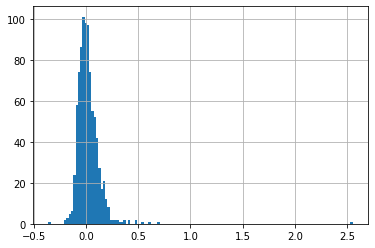

In [32]:
df_606[mask].sharp.hist(bins='auto')

In [33]:
latex_table_generator(df_606[mask][cols_ord].describe(), 
                      "../Results/Gauss_1D_describe.tex",
                      "%.2f", index=True)

In [10]:
from statsmodels.tsa.stattools import kpss

In [6]:
df_606.columns

Index(['ID', 'max_int_x', 'max_int_y', 'var_x', 'var_y'], dtype='object')

In [7]:
y = np.sqrt(df_606.var_y).to_numpy()
mask = np.logical_not(np.isnan(y))
y = y[mask]

kpssTest = kpss(y[y<30000], nlags=1)
pValue = kpssTest[1]
if (pValue > 0.05):
    isStationary = 'Yes'
else:
    isStationary = 'No'

isStationary

c:\Users\cosmi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


'No'

In [8]:
df_606.describe()

,ID,max_int_x,max_int_y,var_x,var_y
count,1.182000e+03,1.179000e+03,1.179000e+03,1179.000000,1179.000000
mean,6.469130e+05,2.557193e+03,2.525371e+03,2.061564,4.465667
std,8.086825e+05,3.258393e+03,2.888340e+03,4.018332,68.688488
min,7.873000e+03,-6.310768e-13,-4.887977e-13,0.000177,0.000037
25%,3.582870e+05,1.071851e+03,1.080434e+03,1.925908,1.851701
50%,5.233915e+05,1.619532e+03,1.611873e+03,2.036390,1.967119
75%,6.799302e+05,2.750586e+03,2.859946e+03,2.173940,2.081441
max,5.002476e+06,3.280440e+04,3.056151e+04,136.332456,2276.020677
